# Task 2 - To Explore Supervised Learning

#### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.What will be predicted score if a student study for 9.25 hrs in a day?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
data = pd.read_csv('Datasets/student_scores - student_scores.csv')

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# plot Average Scores

Text(0.5, 0, 'Scores')

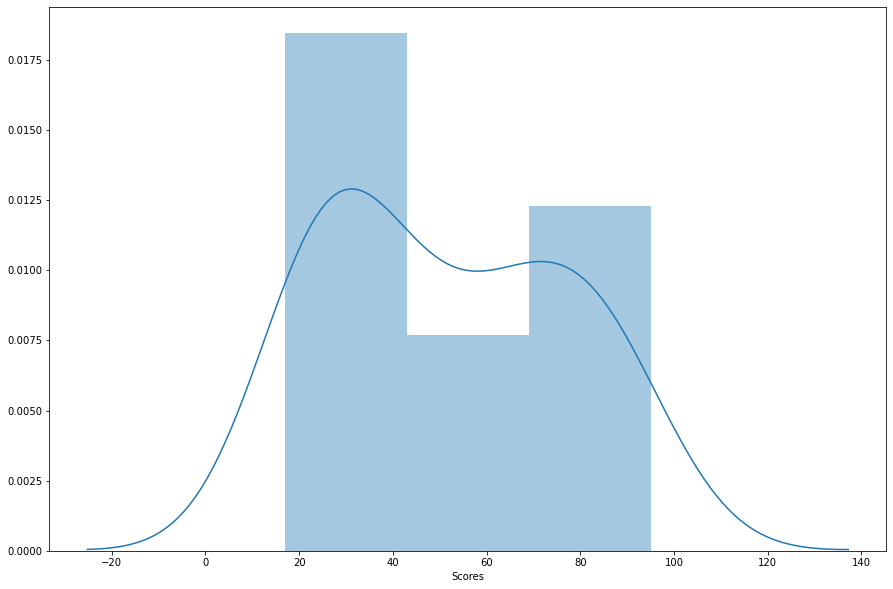

In [6]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(data['Scores'])
plt.xlabel('Scores')

Average scores is nearly between 20 to 40

Text(0, 0.5, 'Marks Percentage')

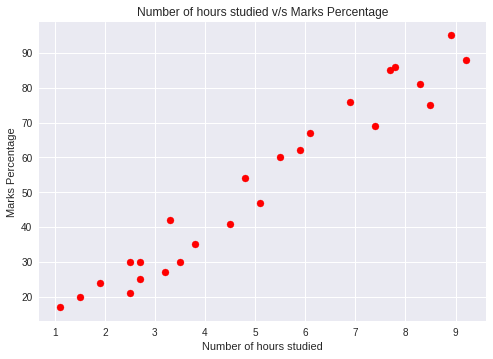

In [7]:
plt.style.use('seaborn')
plt.title('Number of hours studied v/s Marks Percentage')
plt.scatter(data['Hours'],data['Scores'],c = ['red'],cmap=plt.cm.Accent_r)
plt.xlabel('Number of hours studied')
plt.ylabel('Marks Percentage')

### It means Data is linear

In [8]:
X= data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [9]:
X.shape,y.shape

((25, 1), (25,))

In [10]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.25, random_state=42)

In [24]:
ridge = Ridge()
lr = LinearRegression()
ls = Lasso()

In [25]:
ridge.fit(X_train,y_train)
ls.fit(X_train,y_train)
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = ls.predict(X_test)

In [14]:
y_pred

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

In [29]:
print("Mean squared error using Linear Regression : ",metrics.mean_squared_error(y_test,y_pred))
print("Mean Absolute error using Linear Regression : ",metrics.mean_absolute_error(y_test,y_pred))
print('\n\n\n')
print("Mean squared error using Ridge Regression : ",metrics.mean_squared_error(y_test,y_pred_ridge))
print("Mean Absolute error using Ridge Regression : ",metrics.mean_absolute_error(y_test,y_pred_ridge))
print('\n\n\n')
print("Mean squared error using Lasso Regression : ",metrics.mean_squared_error(y_test,y_pred_lasso))
print("Mean Absolute error using Lasso Regression : ",metrics.mean_absolute_error(y_test,y_pred_lasso))

Mean squared error using Linear Regression :  23.516396034595225
Mean Absolute error using Linear Regression :  4.425394675156183




Mean squared error using Ridge Regression :  23.745285060588593
Mean Absolute error using Ridge Regression :  4.424475858975123




Mean squared error using Lasso Regression :  24.00324214930827
Mean Absolute error using Lasso Regression :  4.423677511147937


#### We can select any model because as those model gives same accuracy . I have selected linear regression .Answer using Linear Regression Model

In [15]:
print("According to our model if a student study for 9.5 hours he can achieve the percentage of : ",lr.predict([[9.5]]))

According to our model if a student study for 9.5 hours he can achieve the percentage of :  [94.76424292]


In [17]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

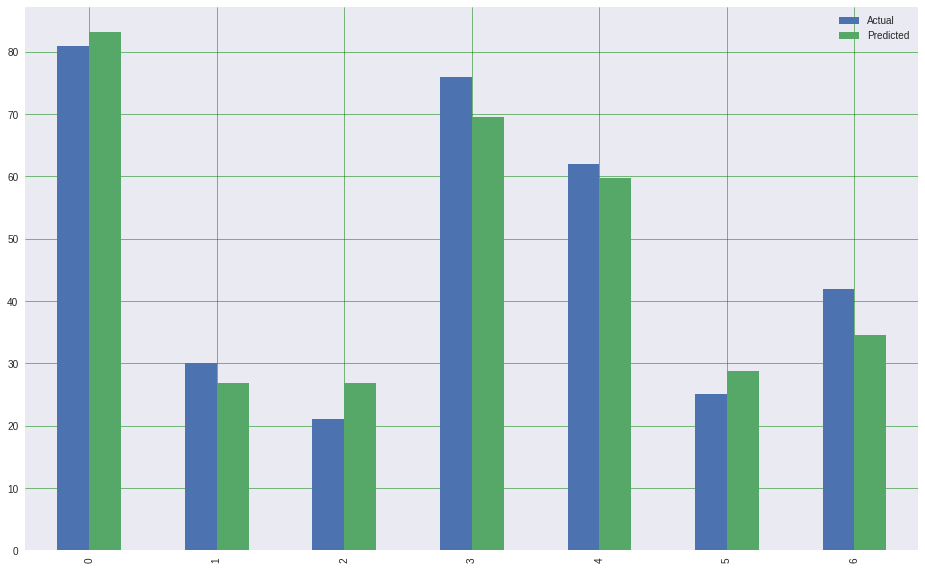

In [18]:
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Bar graph showing the comparison of Actual and Predicted values.

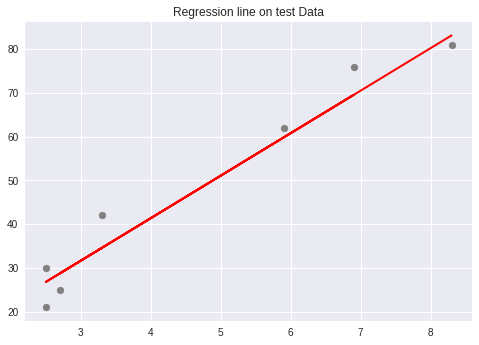

In [20]:
plt.title('Regression line on test Data')
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [22]:
line = lr.coef_*X + lr.intercept_

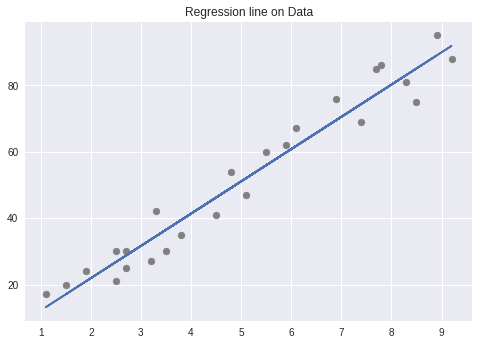

In [23]:
plt.title('Regression line on Data')
plt.scatter(X, y,  color='gray')
plt.plot(X, line)
plt.show()